In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler

import torchvision
from torchvision import datasets, transforms


import numpy as np
import matplotlib.pyplot as plt


import time

### Dataset Loading and Transformation

In [2]:


# Transforms defined for the train, validation, and test datasets
train_transform = transforms.Compose([transforms.Resize((256,256)),
                                     transforms.ToTensor()])

val_transform = transforms.Compose([transforms.Resize((256,256)),
                                   transforms.ToTensor()])


In [3]:
dir = '../Label_Data_TrainTest/'
train_dir, val_dir  = dir+'train', dir+'val',
batch_size = 32
num_workers = 2

# Datasets extracted from their respective directories and some transformation applied to them
train_set = datasets.ImageFolder(train_dir, transform = train_transform)
val_set = datasets.ImageFolder(val_dir, transform = val_transform)



# Datasets loaded onto iterable object in form of batches 
train_loader = torch.utils.data.DataLoader(train_set, batch_size = batch_size, shuffle=True, num_workers=num_workers)
val_loader = torch.utils.data.DataLoader(val_set, batch_size = batch_size, shuffle=True, num_workers=num_workers)



### Loading the pretrained vgg19() model

In [4]:
from torchvision import models
classifier = models.vgg19(pretrained=True)

    
# Modify the last fully connected layer in the model
classifier.classifier[-1] = nn.Linear(in_features=4096, out_features=len(train_set.classes))

# Use GPU computation if available
# device = torch.device("cuda" if torch.cuda.is_available() else 'cpu')

device = torch.device('cuda:0')
classifier.to(device)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

### Training the Network

In [5]:
learning_rate = 1.0e-5
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(classifier.parameters(), lr=learning_rate)


In [6]:

iterations = 4000
loss_train_list = list()
train_accuracy_list = list()

start = time.time()

for i in range(1,iterations+1):
    classifier.train()
    
    images_train, labels_train = iter(train_loader).next()
    images_train, labels_train = images_train.to(device), labels_train.to(device)
    
    optimizer.zero_grad()
    
    output_train = classifier.forward(images_train)
    loss_train = criterion(output_train, labels_train)
    prediction_train = output_train.max(dim=1)[1]

    counter_train = (labels_train == prediction_train).sum().item()
    loss_train_list.append(loss_train)
    train_accuracy_list.append(counter_train/len(output_train))
   
    if i%10 == 0:
        print("Iteration number: {}/{}".format(i, iterations))
        print('Training Accuracy: {:.3f}%'.format(counter_train/len(output_train) * 100))
        time_taken = time.time() - start
        print('Time elapsed: {:.0f}h {:.0f}m {:.0f}s'.format(time_taken//3600, (time_taken%3600)//60, (time_taken%3600)%60))
        print('='*70)
    loss_train.backward()
    optimizer.step()
    

print('Training Finished!')
print('Time elapsed: {:.0f}h {:.0f}m {:.0f}s'.format(time_taken//3600, (time_taken%3600)//60, (time_taken%3600)%60))


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "
/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 10/4000
Training Accuracy: 15.625%
Time elapsed: 0h 0m 13s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "
/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 20/4000
Training Accuracy: 21.875%
Time elapsed: 0h 0m 25s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 30/4000
Training Accuracy: 28.125%
Time elapsed: 0h 0m 36s
Iteration number: 40/4000
Training Accuracy: 37.500%
Time elapsed: 0h 0m 48s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "
/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 50/4000
Training Accuracy: 6.250%
Time elapsed: 0h 0m 60s
Iteration number: 60/4000
Training Accuracy: 21.875%
Time elapsed: 0h 1m 12s
Iteration number: 70/4000
Training Accuracy: 25.000%
Time elapsed: 0h 1m 25s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 80/4000
Training Accuracy: 40.625%
Time elapsed: 0h 1m 36s
Iteration number: 90/4000
Training Accuracy: 40.625%
Time elapsed: 0h 1m 48s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 100/4000
Training Accuracy: 50.000%
Time elapsed: 0h 2m 0s
Iteration number: 110/4000
Training Accuracy: 50.000%
Time elapsed: 0h 2m 12s
Iteration number: 120/4000
Training Accuracy: 53.125%
Time elapsed: 0h 2m 23s
Iteration number: 130/4000
Training Accuracy: 62.500%
Time elapsed: 0h 2m 35s
Iteration number: 140/4000
Training Accuracy: 62.500%
Time elapsed: 0h 2m 47s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 150/4000
Training Accuracy: 65.625%
Time elapsed: 0h 3m 0s
Iteration number: 160/4000
Training Accuracy: 81.250%
Time elapsed: 0h 3m 12s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 170/4000
Training Accuracy: 84.375%
Time elapsed: 0h 3m 24s
Iteration number: 180/4000
Training Accuracy: 62.500%
Time elapsed: 0h 3m 36s
Iteration number: 190/4000
Training Accuracy: 78.125%
Time elapsed: 0h 3m 48s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "
/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 200/4000
Training Accuracy: 78.125%
Time elapsed: 0h 3m 59s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "
/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 210/4000
Training Accuracy: 90.625%
Time elapsed: 0h 4m 11s
Iteration number: 220/4000
Training Accuracy: 84.375%
Time elapsed: 0h 4m 24s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 230/4000
Training Accuracy: 87.500%
Time elapsed: 0h 4m 36s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 240/4000
Training Accuracy: 78.125%
Time elapsed: 0h 4m 48s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 250/4000
Training Accuracy: 93.750%
Time elapsed: 0h 4m 60s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "
/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 260/4000
Training Accuracy: 87.500%
Time elapsed: 0h 5m 11s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 270/4000
Training Accuracy: 96.875%
Time elapsed: 0h 5m 23s
Iteration number: 280/4000
Training Accuracy: 84.375%
Time elapsed: 0h 5m 35s
Iteration number: 290/4000
Training Accuracy: 93.750%
Time elapsed: 0h 5m 46s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "
/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 300/4000
Training Accuracy: 90.625%
Time elapsed: 0h 5m 59s
Iteration number: 310/4000
Training Accuracy: 100.000%
Time elapsed: 0h 6m 11s
Iteration number: 320/4000
Training Accuracy: 84.375%
Time elapsed: 0h 6m 22s
Iteration number: 330/4000
Training Accuracy: 87.500%
Time elapsed: 0h 6m 33s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 340/4000
Training Accuracy: 90.625%
Time elapsed: 0h 6m 46s
Iteration number: 350/4000
Training Accuracy: 93.750%
Time elapsed: 0h 6m 59s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "
/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 360/4000
Training Accuracy: 90.625%
Time elapsed: 0h 7m 10s
Iteration number: 370/4000
Training Accuracy: 93.750%
Time elapsed: 0h 7m 22s
Iteration number: 380/4000
Training Accuracy: 90.625%
Time elapsed: 0h 7m 34s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 390/4000
Training Accuracy: 90.625%
Time elapsed: 0h 7m 47s
Iteration number: 400/4000
Training Accuracy: 96.875%
Time elapsed: 0h 7m 60s
Iteration number: 410/4000
Training Accuracy: 96.875%
Time elapsed: 0h 8m 12s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 420/4000
Training Accuracy: 96.875%
Time elapsed: 0h 8m 24s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 430/4000
Training Accuracy: 100.000%
Time elapsed: 0h 8m 36s
Iteration number: 440/4000
Training Accuracy: 93.750%
Time elapsed: 0h 8m 48s
Iteration number: 450/4000
Training Accuracy: 96.875%
Time elapsed: 0h 8m 60s
Iteration number: 460/4000
Training Accuracy: 93.750%
Time elapsed: 0h 9m 11s
Iteration number: 470/4000
Training Accuracy: 100.000%
Time elapsed: 0h 9m 22s
Iteration number: 480/4000
Training Accuracy: 100.000%
Time elapsed: 0h 9m 34s
Iteration number: 490/4000
Training Accuracy: 100.000%
Time elapsed: 0h 9m 46s
Iteration number: 500/4000
Training Accuracy: 100.000%
Time elapsed: 0h 9m 58s
Iteration number: 510/4000
Training Accuracy: 90.625%
Time elapsed: 0h 10m 10s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 520/4000
Training Accuracy: 100.000%
Time elapsed: 0h 10m 22s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 530/4000
Training Accuracy: 100.000%
Time elapsed: 0h 10m 34s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 540/4000
Training Accuracy: 100.000%
Time elapsed: 0h 10m 46s
Iteration number: 550/4000
Training Accuracy: 96.875%
Time elapsed: 0h 10m 58s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 560/4000
Training Accuracy: 100.000%
Time elapsed: 0h 11m 10s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 570/4000
Training Accuracy: 100.000%
Time elapsed: 0h 11m 21s
Iteration number: 580/4000
Training Accuracy: 100.000%
Time elapsed: 0h 11m 33s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 590/4000
Training Accuracy: 93.750%
Time elapsed: 0h 11m 45s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "
/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 600/4000
Training Accuracy: 93.750%
Time elapsed: 0h 11m 56s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 610/4000
Training Accuracy: 96.875%
Time elapsed: 0h 12m 8s
Iteration number: 620/4000
Training Accuracy: 100.000%
Time elapsed: 0h 12m 20s
Iteration number: 630/4000
Training Accuracy: 100.000%
Time elapsed: 0h 12m 31s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 640/4000
Training Accuracy: 100.000%
Time elapsed: 0h 12m 43s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 650/4000
Training Accuracy: 96.875%
Time elapsed: 0h 12m 56s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "
/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 660/4000
Training Accuracy: 96.875%
Time elapsed: 0h 13m 7s
Iteration number: 670/4000
Training Accuracy: 100.000%
Time elapsed: 0h 13m 20s
Iteration number: 680/4000
Training Accuracy: 100.000%
Time elapsed: 0h 13m 33s
Iteration number: 690/4000
Training Accuracy: 96.875%
Time elapsed: 0h 13m 45s
Iteration number: 700/4000
Training Accuracy: 100.000%
Time elapsed: 0h 13m 57s
Iteration number: 710/4000
Training Accuracy: 100.000%
Time elapsed: 0h 14m 9s
Iteration number: 720/4000
Training Accuracy: 100.000%
Time elapsed: 0h 14m 22s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "
/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 730/4000
Training Accuracy: 100.000%
Time elapsed: 0h 14m 34s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 740/4000
Training Accuracy: 100.000%
Time elapsed: 0h 14m 46s
Iteration number: 750/4000
Training Accuracy: 100.000%
Time elapsed: 0h 14m 58s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 760/4000
Training Accuracy: 100.000%
Time elapsed: 0h 15m 10s
Iteration number: 770/4000
Training Accuracy: 96.875%
Time elapsed: 0h 15m 22s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 780/4000
Training Accuracy: 100.000%
Time elapsed: 0h 15m 34s
Iteration number: 790/4000
Training Accuracy: 100.000%
Time elapsed: 0h 15m 46s
Iteration number: 800/4000
Training Accuracy: 100.000%
Time elapsed: 0h 15m 58s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "
/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 810/4000
Training Accuracy: 100.000%
Time elapsed: 0h 16m 9s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 820/4000
Training Accuracy: 96.875%
Time elapsed: 0h 16m 21s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 830/4000
Training Accuracy: 100.000%
Time elapsed: 0h 16m 33s
Iteration number: 840/4000
Training Accuracy: 100.000%
Time elapsed: 0h 16m 44s
Iteration number: 850/4000
Training Accuracy: 100.000%
Time elapsed: 0h 16m 57s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "
/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "
/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "
/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 860/4000
Training Accuracy: 100.000%
Time elapsed: 0h 17m 8s
Iteration number: 870/4000
Training Accuracy: 100.000%
Time elapsed: 0h 17m 21s
Iteration number: 880/4000
Training Accuracy: 100.000%
Time elapsed: 0h 17m 33s
Iteration number: 890/4000
Training Accuracy: 100.000%
Time elapsed: 0h 17m 45s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 900/4000
Training Accuracy: 100.000%
Time elapsed: 0h 17m 57s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 910/4000
Training Accuracy: 100.000%
Time elapsed: 0h 18m 8s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "
/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 920/4000
Training Accuracy: 100.000%
Time elapsed: 0h 18m 19s
Iteration number: 930/4000
Training Accuracy: 100.000%
Time elapsed: 0h 18m 31s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 940/4000
Training Accuracy: 100.000%
Time elapsed: 0h 18m 44s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 950/4000
Training Accuracy: 100.000%
Time elapsed: 0h 18m 55s
Iteration number: 960/4000
Training Accuracy: 96.875%
Time elapsed: 0h 19m 8s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "
/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 970/4000
Training Accuracy: 96.875%
Time elapsed: 0h 19m 20s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 980/4000
Training Accuracy: 100.000%
Time elapsed: 0h 19m 32s
Iteration number: 990/4000
Training Accuracy: 96.875%
Time elapsed: 0h 19m 44s
Iteration number: 1000/4000
Training Accuracy: 100.000%
Time elapsed: 0h 19m 55s
Iteration number: 1010/4000
Training Accuracy: 100.000%
Time elapsed: 0h 20m 7s
Iteration number: 1020/4000
Training Accuracy: 100.000%
Time elapsed: 0h 20m 18s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 1030/4000
Training Accuracy: 100.000%
Time elapsed: 0h 20m 29s
Iteration number: 1040/4000
Training Accuracy: 100.000%
Time elapsed: 0h 20m 41s
Iteration number: 1050/4000
Training Accuracy: 100.000%
Time elapsed: 0h 20m 53s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "
/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 1060/4000
Training Accuracy: 100.000%
Time elapsed: 0h 21m 5s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 1070/4000
Training Accuracy: 100.000%
Time elapsed: 0h 21m 17s
Iteration number: 1080/4000
Training Accuracy: 100.000%
Time elapsed: 0h 21m 28s
Iteration number: 1090/4000
Training Accuracy: 100.000%
Time elapsed: 0h 21m 40s
Iteration number: 1100/4000
Training Accuracy: 100.000%
Time elapsed: 0h 21m 52s
Iteration number: 1110/4000
Training Accuracy: 100.000%
Time elapsed: 0h 22m 3s
Iteration number: 1120/4000
Training Accuracy: 100.000%
Time elapsed: 0h 22m 16s
Iteration number: 1130/4000
Training Accuracy: 100.000%
Time elapsed: 0h 22m 27s
Iteration number: 1140/4000
Training Accuracy: 100.000%
Time elapsed: 0h 22m 40s
Iteration number: 1150/4000
Training Accuracy: 100.000%
Time elapsed: 0h 22m 52s
Iteration number: 1160/4000
Training Accuracy: 100.000%
Time elapsed: 0h 23m 3s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 1170/4000
Training Accuracy: 100.000%
Time elapsed: 0h 23m 15s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "
/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 1180/4000
Training Accuracy: 100.000%
Time elapsed: 0h 23m 28s
Iteration number: 1190/4000
Training Accuracy: 100.000%
Time elapsed: 0h 23m 40s
Iteration number: 1200/4000
Training Accuracy: 100.000%
Time elapsed: 0h 23m 50s
Iteration number: 1210/4000
Training Accuracy: 100.000%
Time elapsed: 0h 24m 2s
Iteration number: 1220/4000
Training Accuracy: 100.000%
Time elapsed: 0h 24m 14s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 1230/4000
Training Accuracy: 96.875%
Time elapsed: 0h 24m 26s
Iteration number: 1240/4000
Training Accuracy: 100.000%
Time elapsed: 0h 24m 38s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 1250/4000
Training Accuracy: 96.875%
Time elapsed: 0h 24m 49s
Iteration number: 1260/4000
Training Accuracy: 100.000%
Time elapsed: 0h 25m 1s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 1270/4000
Training Accuracy: 100.000%
Time elapsed: 0h 25m 15s
Iteration number: 1280/4000
Training Accuracy: 100.000%
Time elapsed: 0h 25m 27s
Iteration number: 1290/4000
Training Accuracy: 100.000%
Time elapsed: 0h 25m 38s
Iteration number: 1300/4000
Training Accuracy: 100.000%
Time elapsed: 0h 25m 51s
Iteration number: 1310/4000
Training Accuracy: 100.000%
Time elapsed: 0h 26m 3s
Iteration number: 1320/4000
Training Accuracy: 100.000%
Time elapsed: 0h 26m 15s
Iteration number: 1330/4000
Training Accuracy: 100.000%
Time elapsed: 0h 26m 27s
Iteration number: 1340/4000
Training Accuracy: 100.000%
Time elapsed: 0h 26m 39s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "
/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "
/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 1350/4000
Training Accuracy: 100.000%
Time elapsed: 0h 26m 51s
Iteration number: 1360/4000
Training Accuracy: 100.000%
Time elapsed: 0h 27m 2s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "
/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 1370/4000
Training Accuracy: 100.000%
Time elapsed: 0h 27m 14s
Iteration number: 1380/4000
Training Accuracy: 100.000%
Time elapsed: 0h 27m 26s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 1390/4000
Training Accuracy: 100.000%
Time elapsed: 0h 27m 38s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 1400/4000
Training Accuracy: 100.000%
Time elapsed: 0h 27m 50s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "
/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 1410/4000
Training Accuracy: 100.000%
Time elapsed: 0h 28m 2s
Iteration number: 1420/4000
Training Accuracy: 100.000%
Time elapsed: 0h 28m 13s
Iteration number: 1430/4000
Training Accuracy: 100.000%
Time elapsed: 0h 28m 25s
Iteration number: 1440/4000
Training Accuracy: 100.000%
Time elapsed: 0h 28m 37s
Iteration number: 1450/4000
Training Accuracy: 100.000%
Time elapsed: 0h 28m 48s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "
/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 1460/4000
Training Accuracy: 100.000%
Time elapsed: 0h 28m 60s
Iteration number: 1470/4000
Training Accuracy: 100.000%
Time elapsed: 0h 29m 11s
Iteration number: 1480/4000
Training Accuracy: 100.000%
Time elapsed: 0h 29m 22s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "
/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 1490/4000
Training Accuracy: 100.000%
Time elapsed: 0h 29m 34s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 1500/4000
Training Accuracy: 100.000%
Time elapsed: 0h 29m 46s
Iteration number: 1510/4000
Training Accuracy: 100.000%
Time elapsed: 0h 29m 58s
Iteration number: 1520/4000
Training Accuracy: 100.000%
Time elapsed: 0h 30m 9s
Iteration number: 1530/4000
Training Accuracy: 100.000%
Time elapsed: 0h 30m 21s
Iteration number: 1540/4000
Training Accuracy: 96.875%
Time elapsed: 0h 30m 34s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "
/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 1550/4000
Training Accuracy: 100.000%
Time elapsed: 0h 30m 46s
Iteration number: 1560/4000
Training Accuracy: 100.000%
Time elapsed: 0h 30m 57s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 1570/4000
Training Accuracy: 100.000%
Time elapsed: 0h 31m 9s
Iteration number: 1580/4000
Training Accuracy: 100.000%
Time elapsed: 0h 31m 21s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 1590/4000
Training Accuracy: 100.000%
Time elapsed: 0h 31m 32s
Iteration number: 1600/4000
Training Accuracy: 100.000%
Time elapsed: 0h 31m 45s
Iteration number: 1610/4000
Training Accuracy: 100.000%
Time elapsed: 0h 31m 57s
Iteration number: 1620/4000
Training Accuracy: 100.000%
Time elapsed: 0h 32m 10s
Iteration number: 1630/4000
Training Accuracy: 96.875%
Time elapsed: 0h 32m 22s
Iteration number: 1640/4000
Training Accuracy: 100.000%
Time elapsed: 0h 32m 34s
Iteration number: 1650/4000
Training Accuracy: 100.000%
Time elapsed: 0h 32m 46s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 1660/4000
Training Accuracy: 100.000%
Time elapsed: 0h 32m 58s
Iteration number: 1670/4000
Training Accuracy: 100.000%
Time elapsed: 0h 33m 10s
Iteration number: 1680/4000
Training Accuracy: 100.000%
Time elapsed: 0h 33m 22s
Iteration number: 1690/4000
Training Accuracy: 100.000%
Time elapsed: 0h 33m 33s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 1700/4000
Training Accuracy: 100.000%
Time elapsed: 0h 33m 44s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 1710/4000
Training Accuracy: 100.000%
Time elapsed: 0h 33m 56s
Iteration number: 1720/4000
Training Accuracy: 100.000%
Time elapsed: 0h 34m 9s
Iteration number: 1730/4000
Training Accuracy: 100.000%
Time elapsed: 0h 34m 21s
Iteration number: 1740/4000
Training Accuracy: 100.000%
Time elapsed: 0h 34m 32s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 1750/4000
Training Accuracy: 100.000%
Time elapsed: 0h 34m 44s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 1760/4000
Training Accuracy: 100.000%
Time elapsed: 0h 34m 56s
Iteration number: 1770/4000
Training Accuracy: 100.000%
Time elapsed: 0h 35m 9s
Iteration number: 1780/4000
Training Accuracy: 100.000%
Time elapsed: 0h 35m 21s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 1790/4000
Training Accuracy: 100.000%
Time elapsed: 0h 35m 34s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "
/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "
/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 1800/4000
Training Accuracy: 100.000%
Time elapsed: 0h 35m 46s
Iteration number: 1810/4000
Training Accuracy: 100.000%
Time elapsed: 0h 35m 59s
Iteration number: 1820/4000
Training Accuracy: 100.000%
Time elapsed: 0h 36m 10s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 1830/4000
Training Accuracy: 96.875%
Time elapsed: 0h 36m 22s
Iteration number: 1840/4000
Training Accuracy: 100.000%
Time elapsed: 0h 36m 34s
Iteration number: 1850/4000
Training Accuracy: 100.000%
Time elapsed: 0h 36m 45s
Iteration number: 1860/4000
Training Accuracy: 100.000%
Time elapsed: 0h 36m 58s
Iteration number: 1870/4000
Training Accuracy: 100.000%
Time elapsed: 0h 37m 10s
Iteration number: 1880/4000
Training Accuracy: 100.000%
Time elapsed: 0h 37m 22s
Iteration number: 1890/4000
Training Accuracy: 100.000%
Time elapsed: 0h 37m 34s
Iteration number: 1900/4000
Training Accuracy: 100.000%
Time elapsed: 0h 37m 45s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 1910/4000
Training Accuracy: 100.000%
Time elapsed: 0h 37m 57s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "
/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 1920/4000
Training Accuracy: 100.000%
Time elapsed: 0h 38m 10s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 1930/4000
Training Accuracy: 100.000%
Time elapsed: 0h 38m 22s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 1940/4000
Training Accuracy: 100.000%
Time elapsed: 0h 38m 33s
Iteration number: 1950/4000
Training Accuracy: 100.000%
Time elapsed: 0h 38m 45s
Iteration number: 1960/4000
Training Accuracy: 100.000%
Time elapsed: 0h 38m 56s
Iteration number: 1970/4000
Training Accuracy: 100.000%
Time elapsed: 0h 39m 7s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 1980/4000
Training Accuracy: 100.000%
Time elapsed: 0h 39m 19s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 1990/4000
Training Accuracy: 100.000%
Time elapsed: 0h 39m 32s
Iteration number: 2000/4000
Training Accuracy: 100.000%
Time elapsed: 0h 39m 43s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 2010/4000
Training Accuracy: 100.000%
Time elapsed: 0h 39m 56s
Iteration number: 2020/4000
Training Accuracy: 100.000%
Time elapsed: 0h 40m 7s
Iteration number: 2030/4000
Training Accuracy: 100.000%
Time elapsed: 0h 40m 18s
Iteration number: 2040/4000
Training Accuracy: 100.000%
Time elapsed: 0h 40m 31s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "
/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 2050/4000
Training Accuracy: 100.000%
Time elapsed: 0h 40m 43s
Iteration number: 2060/4000
Training Accuracy: 100.000%
Time elapsed: 0h 40m 55s
Iteration number: 2070/4000
Training Accuracy: 100.000%
Time elapsed: 0h 41m 9s
Iteration number: 2080/4000
Training Accuracy: 100.000%
Time elapsed: 0h 41m 20s
Iteration number: 2090/4000
Training Accuracy: 100.000%
Time elapsed: 0h 41m 31s
Iteration number: 2100/4000
Training Accuracy: 100.000%
Time elapsed: 0h 41m 43s
Iteration number: 2110/4000
Training Accuracy: 100.000%
Time elapsed: 0h 41m 53s
Iteration number: 2120/4000
Training Accuracy: 100.000%
Time elapsed: 0h 42m 4s
Iteration number: 2130/4000
Training Accuracy: 100.000%
Time elapsed: 0h 42m 18s
Iteration number: 2140/4000
Training Accuracy: 100.000%
Time elapsed: 0h 42m 29s
Iteration number: 2150/4000
Training Accuracy: 100.000%
Time elapsed: 0h 42m 41s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 2160/4000
Training Accuracy: 100.000%
Time elapsed: 0h 42m 53s
Iteration number: 2170/4000
Training Accuracy: 100.000%
Time elapsed: 0h 43m 5s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 2180/4000
Training Accuracy: 100.000%
Time elapsed: 0h 43m 17s
Iteration number: 2190/4000
Training Accuracy: 100.000%
Time elapsed: 0h 43m 29s
Iteration number: 2200/4000
Training Accuracy: 100.000%
Time elapsed: 0h 43m 41s
Iteration number: 2210/4000
Training Accuracy: 100.000%
Time elapsed: 0h 43m 54s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 2220/4000
Training Accuracy: 100.000%
Time elapsed: 0h 44m 5s
Iteration number: 2230/4000
Training Accuracy: 100.000%
Time elapsed: 0h 44m 17s
Iteration number: 2240/4000
Training Accuracy: 100.000%
Time elapsed: 0h 44m 30s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "
/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 2250/4000
Training Accuracy: 100.000%
Time elapsed: 0h 44m 43s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "
/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 2260/4000
Training Accuracy: 100.000%
Time elapsed: 0h 44m 56s
Iteration number: 2270/4000
Training Accuracy: 100.000%
Time elapsed: 0h 45m 7s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 2280/4000
Training Accuracy: 100.000%
Time elapsed: 0h 45m 19s
Iteration number: 2290/4000
Training Accuracy: 100.000%
Time elapsed: 0h 45m 32s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 2300/4000
Training Accuracy: 100.000%
Time elapsed: 0h 45m 43s
Iteration number: 2310/4000
Training Accuracy: 96.875%
Time elapsed: 0h 45m 55s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 2320/4000
Training Accuracy: 100.000%
Time elapsed: 0h 46m 8s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 2330/4000
Training Accuracy: 100.000%
Time elapsed: 0h 46m 21s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "
/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 2340/4000
Training Accuracy: 100.000%
Time elapsed: 0h 46m 33s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 2350/4000
Training Accuracy: 100.000%
Time elapsed: 0h 46m 44s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "
/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 2360/4000
Training Accuracy: 96.875%
Time elapsed: 0h 46m 57s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 2370/4000
Training Accuracy: 100.000%
Time elapsed: 0h 47m 10s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 2380/4000
Training Accuracy: 100.000%
Time elapsed: 0h 47m 23s
Iteration number: 2390/4000
Training Accuracy: 100.000%
Time elapsed: 0h 47m 35s
Iteration number: 2400/4000
Training Accuracy: 100.000%
Time elapsed: 0h 47m 48s
Iteration number: 2410/4000
Training Accuracy: 100.000%
Time elapsed: 0h 47m 59s
Iteration number: 2420/4000
Training Accuracy: 96.875%
Time elapsed: 0h 48m 11s
Iteration number: 2430/4000
Training Accuracy: 100.000%
Time elapsed: 0h 48m 23s
Iteration number: 2440/4000
Training Accuracy: 100.000%
Time elapsed: 0h 48m 35s
Iteration number: 2450/4000
Training Accuracy: 100.000%
Time elapsed: 0h 48m 46s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 2460/4000
Training Accuracy: 100.000%
Time elapsed: 0h 48m 59s
Iteration number: 2470/4000
Training Accuracy: 100.000%
Time elapsed: 0h 49m 10s
Iteration number: 2480/4000
Training Accuracy: 100.000%
Time elapsed: 0h 49m 23s
Iteration number: 2490/4000
Training Accuracy: 100.000%
Time elapsed: 0h 49m 34s
Iteration number: 2500/4000
Training Accuracy: 100.000%
Time elapsed: 0h 49m 47s
Iteration number: 2510/4000
Training Accuracy: 100.000%
Time elapsed: 0h 49m 60s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "
/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 2520/4000
Training Accuracy: 100.000%
Time elapsed: 0h 50m 11s
Iteration number: 2530/4000
Training Accuracy: 100.000%
Time elapsed: 0h 50m 24s
Iteration number: 2540/4000
Training Accuracy: 100.000%
Time elapsed: 0h 50m 36s
Iteration number: 2550/4000
Training Accuracy: 96.875%
Time elapsed: 0h 50m 47s
Iteration number: 2560/4000
Training Accuracy: 100.000%
Time elapsed: 0h 50m 58s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "
/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "
/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 2570/4000
Training Accuracy: 100.000%
Time elapsed: 0h 51m 10s
Iteration number: 2580/4000
Training Accuracy: 100.000%
Time elapsed: 0h 51m 22s
Iteration number: 2590/4000
Training Accuracy: 100.000%
Time elapsed: 0h 51m 35s
Iteration number: 2600/4000
Training Accuracy: 100.000%
Time elapsed: 0h 51m 48s
Iteration number: 2610/4000
Training Accuracy: 100.000%
Time elapsed: 0h 51m 60s
Iteration number: 2620/4000
Training Accuracy: 100.000%
Time elapsed: 0h 52m 11s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 2630/4000
Training Accuracy: 100.000%
Time elapsed: 0h 52m 23s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 2640/4000
Training Accuracy: 100.000%
Time elapsed: 0h 52m 35s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 2650/4000
Training Accuracy: 100.000%
Time elapsed: 0h 52m 46s
Iteration number: 2660/4000
Training Accuracy: 100.000%
Time elapsed: 0h 52m 58s
Iteration number: 2670/4000
Training Accuracy: 100.000%
Time elapsed: 0h 53m 10s
Iteration number: 2680/4000
Training Accuracy: 100.000%
Time elapsed: 0h 53m 24s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "
/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 2690/4000
Training Accuracy: 100.000%
Time elapsed: 0h 53m 36s
Iteration number: 2700/4000
Training Accuracy: 100.000%
Time elapsed: 0h 53m 48s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "
/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "
/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 2710/4000
Training Accuracy: 100.000%
Time elapsed: 0h 53m 60s
Iteration number: 2720/4000
Training Accuracy: 100.000%
Time elapsed: 0h 54m 12s
Iteration number: 2730/4000
Training Accuracy: 100.000%
Time elapsed: 0h 54m 25s
Iteration number: 2740/4000
Training Accuracy: 100.000%
Time elapsed: 0h 54m 37s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 2750/4000
Training Accuracy: 100.000%
Time elapsed: 0h 54m 49s
Iteration number: 2760/4000
Training Accuracy: 100.000%
Time elapsed: 0h 55m 1s
Iteration number: 2770/4000
Training Accuracy: 96.875%
Time elapsed: 0h 55m 13s
Iteration number: 2780/4000
Training Accuracy: 100.000%
Time elapsed: 0h 55m 25s
Iteration number: 2790/4000
Training Accuracy: 100.000%
Time elapsed: 0h 55m 37s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 2800/4000
Training Accuracy: 100.000%
Time elapsed: 0h 55m 49s
Iteration number: 2810/4000
Training Accuracy: 100.000%
Time elapsed: 0h 55m 60s
Iteration number: 2820/4000
Training Accuracy: 100.000%
Time elapsed: 0h 56m 12s
Iteration number: 2830/4000
Training Accuracy: 100.000%
Time elapsed: 0h 56m 25s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 2840/4000
Training Accuracy: 100.000%
Time elapsed: 0h 56m 38s
Iteration number: 2850/4000
Training Accuracy: 100.000%
Time elapsed: 0h 56m 50s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 2860/4000
Training Accuracy: 100.000%
Time elapsed: 0h 57m 2s
Iteration number: 2870/4000
Training Accuracy: 96.875%
Time elapsed: 0h 57m 15s
Iteration number: 2880/4000
Training Accuracy: 100.000%
Time elapsed: 0h 57m 28s
Iteration number: 2890/4000
Training Accuracy: 100.000%
Time elapsed: 0h 57m 40s
Iteration number: 2900/4000
Training Accuracy: 100.000%
Time elapsed: 0h 57m 51s
Iteration number: 2910/4000
Training Accuracy: 100.000%
Time elapsed: 0h 58m 3s
Iteration number: 2920/4000
Training Accuracy: 100.000%
Time elapsed: 0h 58m 15s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 2930/4000
Training Accuracy: 100.000%
Time elapsed: 0h 58m 27s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 2940/4000
Training Accuracy: 100.000%
Time elapsed: 0h 58m 39s
Iteration number: 2950/4000
Training Accuracy: 100.000%
Time elapsed: 0h 58m 50s
Iteration number: 2960/4000
Training Accuracy: 100.000%
Time elapsed: 0h 59m 3s
Iteration number: 2970/4000
Training Accuracy: 100.000%
Time elapsed: 0h 59m 16s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 2980/4000
Training Accuracy: 100.000%
Time elapsed: 0h 59m 29s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "
/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 2990/4000
Training Accuracy: 100.000%
Time elapsed: 0h 59m 42s
Iteration number: 3000/4000
Training Accuracy: 100.000%
Time elapsed: 0h 59m 53s
Iteration number: 3010/4000
Training Accuracy: 100.000%
Time elapsed: 1h 0m 4s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 3020/4000
Training Accuracy: 100.000%
Time elapsed: 1h 0m 17s
Iteration number: 3030/4000
Training Accuracy: 100.000%
Time elapsed: 1h 0m 30s
Iteration number: 3040/4000
Training Accuracy: 100.000%
Time elapsed: 1h 0m 42s
Iteration number: 3050/4000
Training Accuracy: 100.000%
Time elapsed: 1h 0m 54s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 3060/4000
Training Accuracy: 100.000%
Time elapsed: 1h 1m 5s
Iteration number: 3070/4000
Training Accuracy: 100.000%
Time elapsed: 1h 1m 17s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 3080/4000
Training Accuracy: 96.875%
Time elapsed: 1h 1m 29s
Iteration number: 3090/4000
Training Accuracy: 100.000%
Time elapsed: 1h 1m 41s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 3100/4000
Training Accuracy: 100.000%
Time elapsed: 1h 1m 53s
Iteration number: 3110/4000
Training Accuracy: 100.000%
Time elapsed: 1h 2m 5s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 3120/4000
Training Accuracy: 100.000%
Time elapsed: 1h 2m 16s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 3130/4000
Training Accuracy: 100.000%
Time elapsed: 1h 2m 29s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 3140/4000
Training Accuracy: 100.000%
Time elapsed: 1h 2m 41s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 3150/4000
Training Accuracy: 100.000%
Time elapsed: 1h 2m 53s
Iteration number: 3160/4000
Training Accuracy: 100.000%
Time elapsed: 1h 3m 5s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 3170/4000
Training Accuracy: 100.000%
Time elapsed: 1h 3m 17s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 3180/4000
Training Accuracy: 100.000%
Time elapsed: 1h 3m 29s
Iteration number: 3190/4000
Training Accuracy: 100.000%
Time elapsed: 1h 3m 42s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 3200/4000
Training Accuracy: 100.000%
Time elapsed: 1h 3m 53s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 3210/4000
Training Accuracy: 100.000%
Time elapsed: 1h 4m 6s
Iteration number: 3220/4000
Training Accuracy: 100.000%
Time elapsed: 1h 4m 19s
Iteration number: 3230/4000
Training Accuracy: 100.000%
Time elapsed: 1h 4m 31s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 3240/4000
Training Accuracy: 100.000%
Time elapsed: 1h 4m 44s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 3250/4000
Training Accuracy: 100.000%
Time elapsed: 1h 4m 56s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 3260/4000
Training Accuracy: 100.000%
Time elapsed: 1h 5m 7s
Iteration number: 3270/4000
Training Accuracy: 100.000%
Time elapsed: 1h 5m 20s
Iteration number: 3280/4000
Training Accuracy: 100.000%
Time elapsed: 1h 5m 31s
Iteration number: 3290/4000
Training Accuracy: 100.000%
Time elapsed: 1h 5m 43s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 3300/4000
Training Accuracy: 100.000%
Time elapsed: 1h 5m 55s
Iteration number: 3310/4000
Training Accuracy: 100.000%
Time elapsed: 1h 6m 7s
Iteration number: 3320/4000
Training Accuracy: 100.000%
Time elapsed: 1h 6m 18s
Iteration number: 3330/4000
Training Accuracy: 100.000%
Time elapsed: 1h 6m 30s
Iteration number: 3340/4000
Training Accuracy: 100.000%
Time elapsed: 1h 6m 42s
Iteration number: 3350/4000
Training Accuracy: 100.000%
Time elapsed: 1h 6m 54s
Iteration number: 3360/4000
Training Accuracy: 100.000%
Time elapsed: 1h 7m 7s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 3370/4000
Training Accuracy: 100.000%
Time elapsed: 1h 7m 18s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 3380/4000
Training Accuracy: 100.000%
Time elapsed: 1h 7m 31s
Iteration number: 3390/4000
Training Accuracy: 100.000%
Time elapsed: 1h 7m 43s
Iteration number: 3400/4000
Training Accuracy: 100.000%
Time elapsed: 1h 7m 57s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 3410/4000
Training Accuracy: 100.000%
Time elapsed: 1h 8m 10s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "
/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 3420/4000
Training Accuracy: 100.000%
Time elapsed: 1h 8m 21s
Iteration number: 3430/4000
Training Accuracy: 100.000%
Time elapsed: 1h 8m 33s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 3440/4000
Training Accuracy: 100.000%
Time elapsed: 1h 8m 44s
Iteration number: 3450/4000
Training Accuracy: 100.000%
Time elapsed: 1h 8m 57s
Iteration number: 3460/4000
Training Accuracy: 100.000%
Time elapsed: 1h 9m 9s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 3470/4000
Training Accuracy: 100.000%
Time elapsed: 1h 9m 22s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 3480/4000
Training Accuracy: 100.000%
Time elapsed: 1h 9m 35s
Iteration number: 3490/4000
Training Accuracy: 100.000%
Time elapsed: 1h 9m 47s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 3500/4000
Training Accuracy: 100.000%
Time elapsed: 1h 10m 1s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 3510/4000
Training Accuracy: 100.000%
Time elapsed: 1h 10m 13s
Iteration number: 3520/4000
Training Accuracy: 100.000%
Time elapsed: 1h 10m 25s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 3530/4000
Training Accuracy: 100.000%
Time elapsed: 1h 10m 36s
Iteration number: 3540/4000
Training Accuracy: 100.000%
Time elapsed: 1h 10m 48s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 3550/4000
Training Accuracy: 100.000%
Time elapsed: 1h 10m 60s
Iteration number: 3560/4000
Training Accuracy: 100.000%
Time elapsed: 1h 11m 10s
Iteration number: 3570/4000
Training Accuracy: 100.000%
Time elapsed: 1h 11m 23s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "
/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 3580/4000
Training Accuracy: 100.000%
Time elapsed: 1h 11m 34s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 3590/4000
Training Accuracy: 100.000%
Time elapsed: 1h 11m 47s
Iteration number: 3600/4000
Training Accuracy: 100.000%
Time elapsed: 1h 11m 58s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 3610/4000
Training Accuracy: 100.000%
Time elapsed: 1h 12m 10s
Iteration number: 3620/4000
Training Accuracy: 100.000%
Time elapsed: 1h 12m 23s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 3630/4000
Training Accuracy: 100.000%
Time elapsed: 1h 12m 35s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 3640/4000
Training Accuracy: 100.000%
Time elapsed: 1h 12m 48s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 3650/4000
Training Accuracy: 100.000%
Time elapsed: 1h 12m 59s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 3660/4000
Training Accuracy: 100.000%
Time elapsed: 1h 13m 12s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "
/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 3670/4000
Training Accuracy: 100.000%
Time elapsed: 1h 13m 24s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 3680/4000
Training Accuracy: 96.875%
Time elapsed: 1h 13m 37s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 3690/4000
Training Accuracy: 100.000%
Time elapsed: 1h 13m 49s
Iteration number: 3700/4000
Training Accuracy: 100.000%
Time elapsed: 1h 14m 1s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 3710/4000
Training Accuracy: 100.000%
Time elapsed: 1h 14m 13s
Iteration number: 3720/4000
Training Accuracy: 100.000%
Time elapsed: 1h 14m 26s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "
/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 3730/4000
Training Accuracy: 96.875%
Time elapsed: 1h 14m 38s
Iteration number: 3740/4000
Training Accuracy: 100.000%
Time elapsed: 1h 14m 51s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 3750/4000
Training Accuracy: 100.000%
Time elapsed: 1h 15m 3s
Iteration number: 3760/4000
Training Accuracy: 100.000%
Time elapsed: 1h 15m 14s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 3770/4000
Training Accuracy: 100.000%
Time elapsed: 1h 15m 27s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 3780/4000
Training Accuracy: 100.000%
Time elapsed: 1h 15m 40s
Iteration number: 3790/4000
Training Accuracy: 100.000%
Time elapsed: 1h 15m 52s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 3800/4000
Training Accuracy: 96.875%
Time elapsed: 1h 16m 4s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 3810/4000
Training Accuracy: 100.000%
Time elapsed: 1h 16m 17s
Iteration number: 3820/4000
Training Accuracy: 100.000%
Time elapsed: 1h 16m 28s
Iteration number: 3830/4000
Training Accuracy: 100.000%
Time elapsed: 1h 16m 40s
Iteration number: 3840/4000
Training Accuracy: 96.875%
Time elapsed: 1h 16m 52s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 3850/4000
Training Accuracy: 100.000%
Time elapsed: 1h 17m 4s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "
/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 3860/4000
Training Accuracy: 100.000%
Time elapsed: 1h 17m 16s
Iteration number: 3870/4000
Training Accuracy: 100.000%
Time elapsed: 1h 17m 29s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 3880/4000
Training Accuracy: 100.000%
Time elapsed: 1h 17m 41s
Iteration number: 3890/4000
Training Accuracy: 100.000%
Time elapsed: 1h 17m 53s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 3900/4000
Training Accuracy: 100.000%
Time elapsed: 1h 18m 6s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 3910/4000
Training Accuracy: 100.000%
Time elapsed: 1h 18m 19s
Iteration number: 3920/4000
Training Accuracy: 100.000%
Time elapsed: 1h 18m 31s
Iteration number: 3930/4000
Training Accuracy: 100.000%
Time elapsed: 1h 18m 43s
Iteration number: 3940/4000
Training Accuracy: 100.000%
Time elapsed: 1h 18m 54s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "
/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 3950/4000
Training Accuracy: 100.000%
Time elapsed: 1h 19m 6s
Iteration number: 3960/4000
Training Accuracy: 100.000%
Time elapsed: 1h 19m 18s
Iteration number: 3970/4000
Training Accuracy: 100.000%
Time elapsed: 1h 19m 30s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 3980/4000
Training Accuracy: 100.000%
Time elapsed: 1h 19m 42s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "
/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 3990/4000
Training Accuracy: 100.000%
Time elapsed: 1h 19m 54s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 4000/4000
Training Accuracy: 100.000%
Time elapsed: 1h 20m 8s
Training Finished!
Time elapsed: 1h 20m 8s


<Figure size 432x288 with 0 Axes>

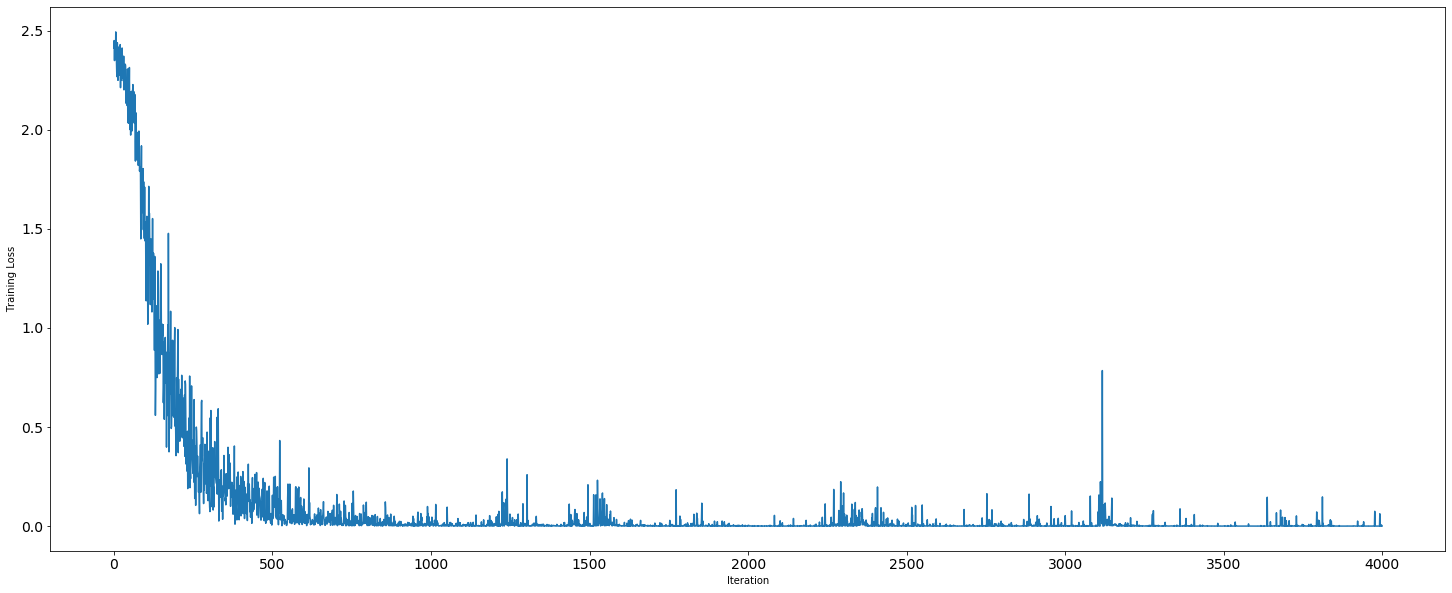

<Figure size 432x288 with 0 Axes>

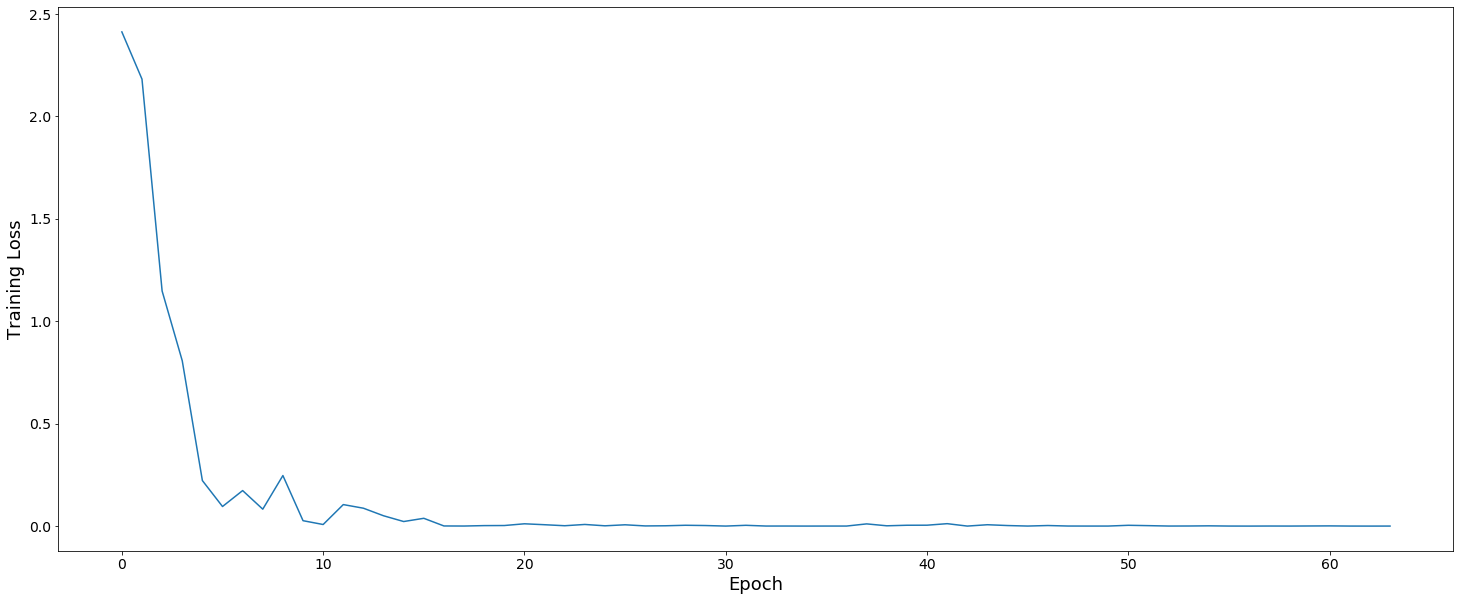

<Figure size 432x288 with 0 Axes>

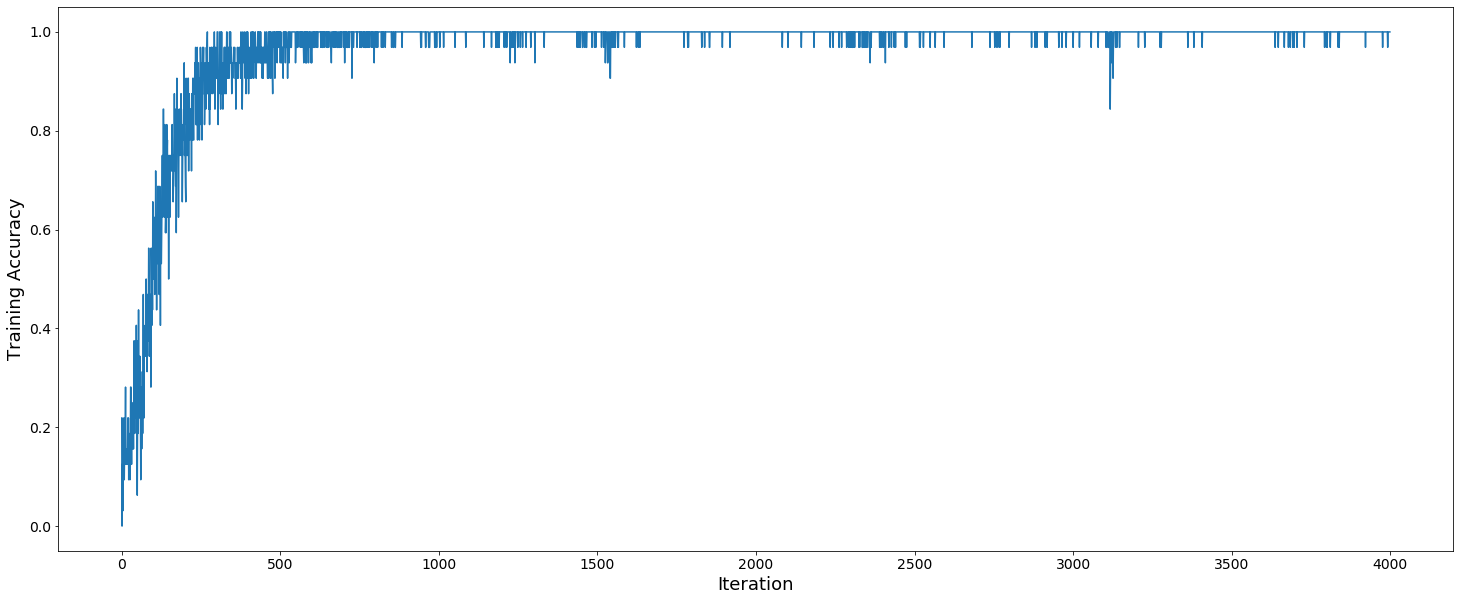

In [7]:
# Loss at the end of every Iteration

plt.figure(1)
plt.figure(figsize = (25,10))
plt.plot(np.array(loss_train_list), '-')
plt.xlabel('Iteration')
plt.ylabel('Training Loss')
plt.rc('axes', labelsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()


# Loss at the end of every epoch

LossPerEpoch = []
for x in range(0, len(loss_train_list) +1, len(train_loader)):
    LossPerEpoch.append(loss_train_list[x])
    
plt.figure(2)
plt.figure(figsize = (25,10))
plt.plot(np.array(LossPerEpoch), '-')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.rc('axes', labelsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

plt.figure(3)
plt.figure(figsize = (25,10))
plt.plot(np.array(train_accuracy_list), '-')
plt.xlabel('Iteration')
plt.ylabel('Training Accuracy')
plt.rc('axes', labelsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

### Save the finetuned model

In [1]:
# print("Our Model: \n\n", classifier, '\n')
# print("The state dict keys: \n\n", classifier.state_dict().keys())

In [9]:
# saving the model as a checkpoint file
torch.save(classifier.state_dict(), 'vgg16_4000Iterations.pth')

In [ ]:
from numpy import savetxt

loss_vgg = np.array(loss_train_list)
accuracy_vgg = np.array(train_accuracy_list)

savetxt('loss_vgg19.csv', loss_vgg, delimiter=',')
savetxt('accuracy_vgg19.csv', accuracy_vgg, delimiter=',')